In [3]:

# prompt: 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import nltk
nltk.download('all')

[nltk_data]    | Downloading package mac_morpho to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/mac_morpho.zip.
[nltk_data]    | Downloading package machado to /root/nltk_data...
[nltk_data]    | Downloading package masc_tagged to /root/nltk_data...
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping models/moses_sample.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package mte_teip5 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/m

True

#데이터 받기

In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kdt/gain/unzip_feed/df_sim_wc_tf_just.csv')

#word2vect 시작

In [6]:
df = df.drop(columns=['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','discourse_id'])

In [7]:
import pandas as pd

# 'cosine_sim'과 'cosine_lener' 열의 값이 완전히 같은지 확인
are_equal = df['cosine_sim'].equals(df['cosine_lener'])

# 결과 출력
print("Values of 'cosine_sim' and 'cosine_lener' are completely equal:", are_equal)


Values of 'cosine_sim' and 'cosine_lener' are completely equal: False


In [8]:
one_hot_encoded = pd.get_dummies(df['discourse_effectiveness'], prefix='discourse')
df=pd.concat([df,one_hot_encoded], axis=1)
df = df.drop(columns=['discourse_effectiveness'])
df.head()

,essay_id,discourse_text,discourse_type,cosine_sim,cosine_lener,wordcount,NN,VBG,NNS,JJ,...,FW,RBS,UH,PDT,POS,NNPS,'',SYM,discourse_Adequate,discourse_Effective
0,hi im isaac im going writing face mars natural...,hi im isaac im going writing face mars natural...,Lead,0.681594,0.681594,30,0.366667,0.066667,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
1,hi im isaac im going writing face mars natural...,perspective think face natural landform dont t...,Position,0.616788,0.616788,16,0.562500,0.062500,0.062500,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
2,hi im isaac im going writing face mars natural...,think face natural landform life mars descover...,Claim,0.652517,0.652517,8,0.250000,0.000000,0.125000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
3,hi im isaac im going writing face mars natural...,life mars would know now reason think natural ...,Evidence,0.627105,0.627105,33,0.363636,0.060606,0.060606,0.212121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,hi im isaac im going writing face mars natural...,people thought face formed alieans thought lif...,Counterclaim,0.362918,0.362918,8,0.250000,0.000000,0.375000,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False


In [9]:
import nltk
from nltk.tokenize import word_tokenize


essay_tokenized_sentences=[]
discours_tokenized_sentences=[]
for essay_sentence,discours_sentence in zip(df['essay_id'],df['discourse_text']):
   tokens = word_tokenize(essay_sentence)
   essay_tokenized_sentences.append(tokens)

   tokens = word_tokenize(discours_sentence)
   discours_tokenized_sentences.append(tokens)


In [10]:
### skip-gram 모델 --> 단어 사전 생성 / 임베딩 벡터 생성
from gensim.models.word2vec import Word2Vec
essay_sg = Word2Vec(sentences=essay_tokenized_sentences, vector_size=13, window=5, min_count=1, workers=1, sg=1, seed=0)
discours_sg = Word2Vec(sentences=discours_tokenized_sentences, vector_size=13, window=5, min_count=1, workers=1, sg=1, seed=0)

In [11]:
# 단어 사전 확인하기
vocab = essay_sg.wv.key_to_index
print(f'생성된 단어 사전 확인 : \n{vocab}')

생성된 단어 사전 확인 : 
{'students': 0, 'would': 1, 'people': 2, 'school': 3, 'electoral': 4, 'college': 5, 'could': 6, 'vote': 7, 'get': 8, 'one': 9, 'time': 10, 'like': 11, 'also': 12, 'help': 13, 'make': 14, 'think': 15, 'many': 16, 'student': 17, 'work': 18, 'even': 19, 'way': 20, 'president': 21, 'may': 22, 'want': 23, 'know': 24, 'states': 25, 'home': 26, 'learning': 27, 'cars': 28, 'online': 29, 'good': 30, 'better': 31, 'summer': 32, 'able': 33, 'take': 34, 'need': 35, 'car': 36, 'venus': 37, 'project': 38, 'classes': 39, 'projects': 40, 'go': 41, 'teachers': 42, 'votes': 43, 'things': 44, 'something': 45, 'it': 46, 'person': 47, 'new': 48, 'class': 49, 'face': 50, 'system': 51, 'use': 52, 'electors': 53, 'learn': 54, 'community': 55, 'life': 56, 'teacher': 57, 'see': 58, 'going': 59, 'much': 60, 'popular': 61, 'might': 62, 'different': 63, 'us': 64, 'say': 65, 'state': 66, 'reason': 67, 'technology': 68, 'really': 69, 'another': 70, 'idea': 71, 'driving': 72, 'example': 73, 'election'

#essay_tokenized_sentences

In [12]:
new_columns = [f'essay_{i+1}' for i in range(13)]
for col in new_columns:
    df[col] = 0

In [13]:
### 문장의 임베딩(행렬화)

# 각 문장별 토큰들에 대한 임베딩 벡터를 저장할 리스트 생성

for index in range(df.shape[0]):
  sentence_embedding1 = []
  # 첫번째 문장 --> 임베딩(행렬화)
  for token in essay_tokenized_sentences[index]:
      token_vec = essay_sg.wv[token]
      sentence_embedding1.append(token_vec)
  # 첫번째 문장 임베딩 결과 --> 데이터프레임 생성
  df_sent1 = pd.DataFrame(data=sentence_embedding1)
  embedding1 = df_sent1.mean().values.reshape((1,13))
  k=pd.DataFrame(data=embedding1)
  k = k.rename(columns=dict(zip(k.columns, new_columns)))
  for i in new_columns:
    df[i].iloc[index]=k[i].iloc[0]

<ipython-input-13-e6e2bd27e34d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[index]=k[i].iloc[0]
<ipython-input-13-e6e2bd27e34d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[index]=k[i].iloc[0]
<ipython-input-13-e6e2bd27e34d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[index]=k[i].iloc[0]
<ipython-input-13-e6e2bd27e34d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy o

#discours_tokenized_sentences

In [14]:
new_columns = [f'discourse_{i+1}' for i in range(13)]
for col in new_columns:
    df[col] = 0

In [15]:
### 문장의 임베딩(행렬화)

# 각 문장별 토큰들에 대한 임베딩 벡터를 저장할 리스트 생성

for index in range(df.shape[0]):
  sentence_embedding1 = []
  # 첫번째 문장 --> 임베딩(행렬화)
  for token in discours_tokenized_sentences[index]:
      token_vec = discours_sg.wv[token]
      sentence_embedding1.append(token_vec)
  # 첫번째 문장 임베딩 결과 --> 데이터프레임 생성
  df_sent1 = pd.DataFrame(data=sentence_embedding1)
  embedding1 = df_sent1.mean().values.reshape((1,13))
  k=pd.DataFrame(data=embedding1)
  k = k.rename(columns=dict(zip(k.columns, new_columns)))
  for i in new_columns:
    df[i].iloc[index]=k[i].iloc[0]

<ipython-input-15-907628b001a8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[index]=k[i].iloc[0]
<ipython-input-15-907628b001a8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[index]=k[i].iloc[0]
<ipython-input-15-907628b001a8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[index]=k[i].iloc[0]
<ipython-input-15-907628b001a8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [16]:
df.head()

,essay_id,discourse_text,discourse_type,cosine_sim,cosine_lener,wordcount,NN,VBG,NNS,JJ,...,discourse_4,discourse_5,discourse_6,discourse_7,discourse_8,discourse_9,discourse_10,discourse_11,discourse_12,discourse_13
0,hi im isaac im going writing face mars natural...,hi im isaac im going writing face mars natural...,Lead,0.681594,0.681594,30,0.366667,0.066667,0.166667,0.166667,...,-0.693056,-0.340168,0.304361,-0.049966,-0.053797,-1.831989,-0.394300,1.096946,1.162900,0.221112
1,hi im isaac im going writing face mars natural...,perspective think face natural landform dont t...,Position,0.616788,0.616788,16,0.562500,0.062500,0.062500,0.125000,...,-0.785912,-0.047505,0.369027,-0.115370,-0.146221,-1.638429,-0.275976,1.258888,1.173478,0.218658
2,hi im isaac im going writing face mars natural...,think face natural landform life mars descover...,Claim,0.652517,0.652517,8,0.250000,0.000000,0.125000,0.250000,...,-0.789969,-0.473396,0.436484,-0.023400,-0.042592,-1.822565,-0.332269,1.062453,1.126059,0.068791
3,hi im isaac im going writing face mars natural...,life mars would know now reason think natural ...,Evidence,0.627105,0.627105,33,0.363636,0.060606,0.060606,0.212121,...,-0.662538,-0.088283,0.333077,-0.104883,-0.253822,-1.173108,-0.226440,1.273519,1.259697,0.131795
4,hi im isaac im going writing face mars natural...,people thought face formed alieans thought lif...,Counterclaim,0.362918,0.362918,8,0.250000,0.000000,0.375000,0.125000,...,-0.603124,-0.389534,0.463359,0.023204,-0.016163,-1.481449,-0.283455,1.152459,1.051479,0.130601


In [17]:
df = df.drop(columns=['essay_id','discourse_text'])


{'Lead': 0,
 'Position': 1,
 'Claim': 2,
 'Evidence': 3,
 'Counterclaim': 4,
 'Concluding Statement': 5,
 'Rebuttal': 6}
 이런식으로 매핑하였음

In [18]:
mapping = {value: index for index, value in enumerate(df.discourse_type.unique())}

# 변환
df['discourse_type'] = df['discourse_type'].replace(mapping)

In [19]:
mapping

{'Lead': 0,
 'Position': 1,
 'Claim': 2,
 'Evidence': 3,
 'Counterclaim': 4,
 'Concluding Statement': 5,
 'Rebuttal': 6}

In [20]:
df.columns

Index(['discourse_type', 'cosine_sim', 'cosine_lener', 'wordcount', 'NN',
       'VBG', 'NNS', 'JJ', 'VBD', 'PRP', 'VBP', 'VBN', 'IN', 'VB', 'RB', 'MD',
       'VBZ', 'PRP$', 'DT', 'JJR', 'RBR', 'CD', 'WRB', 'RP', 'JJS', 'WDT',
       'CC', 'WP$', 'TO', 'EX', 'NNP', 'WP', 'FW', 'RBS', 'UH', 'PDT', 'POS',
       'NNPS', '''', 'SYM', 'discourse_Adequate', 'discourse_Effective',
       'essay_1', 'essay_2', 'essay_3', 'essay_4', 'essay_5', 'essay_6',
       'essay_7', 'essay_8', 'essay_9', 'essay_10', 'essay_11', 'essay_12',
       'essay_13', 'discourse_1', 'discourse_2', 'discourse_3', 'discourse_4',
       'discourse_5', 'discourse_6', 'discourse_7', 'discourse_8',
       'discourse_9', 'discourse_10', 'discourse_11', 'discourse_12',
       'discourse_13'],
      dtype='object')

In [21]:
##라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

df['discourse_type'] = df['discourse_type'].astype(int)

X = df[['cosine_sim', 'wordcount', 'NN',
       'VBG', 'NNS', 'JJ', 'VBD', 'PRP', 'VBP', 'VBN', 'IN', 'VB', 'RB', 'MD',
       'VBZ', 'PRP$', 'DT', 'JJR', 'RBR', 'CD', 'WRB', 'RP', 'JJS', 'WDT',
       'CC', 'TO', 'EX', 'NNP', 'WP', 'FW', 'RBS', 'UH', 'PDT',
        "''",  'discourse_Adequate',
       'essay_1', 'essay_2', 'essay_3', 'essay_4', 'essay_5', 'essay_6',
       'essay_7', 'essay_8', 'essay_9', 'essay_10', 'essay_11', 'essay_12',
       'essay_13', 'discourse_1', 'discourse_2', 'discourse_3', 'discourse_4',
       'discourse_5', 'discourse_6', 'discourse_7', 'discourse_8',
       'discourse_9', 'discourse_10', 'discourse_11', 'discourse_12',
       'discourse_13']]

y = df[['discourse_type']].values.ravel()

## 학습,테스트,트레인,테스트출력
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

##학습할 컬럼 지정
X_train_cat = X_train.loc[:, ['cosine_sim', 'wordcount', 'NN',
       'VBG', 'NNS', 'JJ', 'VBD', 'PRP', 'VBP', 'VBN', 'IN', 'VB', 'RB', 'MD',
       'VBZ', 'PRP$', 'DT', 'JJR', 'RBR', 'CD', 'WRB', 'RP', 'JJS', 'WDT',
       'CC', 'TO', 'EX', 'NNP', 'WP', 'FW', 'RBS', 'UH', 'PDT',
        "''",  'discourse_Adequate',
       'essay_1', 'essay_2', 'essay_3', 'essay_4', 'essay_5', 'essay_6',
       'essay_7', 'essay_8', 'essay_9', 'essay_10', 'essay_11', 'essay_12',
       'essay_13', 'discourse_1', 'discourse_2', 'discourse_3', 'discourse_4',
       'discourse_5', 'discourse_6', 'discourse_7', 'discourse_8',
       'discourse_9', 'discourse_10', 'discourse_11', 'discourse_12',
       'discourse_13']]
X_test_cat = X_test.loc[:, ['cosine_sim', 'wordcount', 'NN',
       'VBG', 'NNS', 'JJ', 'VBD', 'PRP', 'VBP', 'VBN', 'IN', 'VB', 'RB', 'MD',
       'VBZ', 'PRP$', 'DT', 'JJR', 'RBR', 'CD', 'WRB', 'RP', 'JJS', 'WDT',
       'CC', 'TO', 'EX', 'NNP', 'WP', 'FW', 'RBS', 'UH', 'PDT',
        "''",  'discourse_Adequate',
       'essay_1', 'essay_2', 'essay_3', 'essay_4', 'essay_5', 'essay_6',
       'essay_7', 'essay_8', 'essay_9', 'essay_10', 'essay_11', 'essay_12',
       'essay_13', 'discourse_1', 'discourse_2', 'discourse_3', 'discourse_4',
       'discourse_5', 'discourse_6', 'discourse_7', 'discourse_8',
       'discourse_9', 'discourse_10', 'discourse_11', 'discourse_12',
       'discourse_13']]




In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
##8개의 모델 사용
np.random.seed(41)
models ={"Logistic Regression": LogisticRegression(max_iter=2000, random_state=41), "Random Forest Classifier": RandomForestClassifier(random_state=41),
         "KNN": KNeighborsClassifier(), "Support Vector Classifier": SVC(random_state=41), "Naive Bayes": GaussianNB(),
         "Gradient Boosting": GradientBoostingClassifier(random_state=41), "Decision Tree Classifer": DecisionTreeClassifier(random_state=41),
         "Bagging": BaggingClassifier(random_state=41)}

##8개의 모델 정확도 출력
results = []
for name, model in models.items():
	kf = KFold(n_splits=5, random_state=41, shuffle=True)
	cv_results = cross_val_score(model, X_train_cat, y_train, cv=kf)
	results.append(cv_results)
	print("{} Mean Cross-Validation Accuracy Score: {}".format(name, cv_results.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Mean Cross-Validation Accuracy Score: 0.6273773934542206
Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.6095135060235959
KNN Mean Cross-Validation Accuracy Score: 0.549279921029033
Support Vector Classifier Mean Cross-Validation Accuracy Score: 0.5585211940835098
Naive Bayes Mean Cross-Validation Accuracy Score: 0.2995153427556496
Gradient Boosting Mean Cross-Validation Accuracy Score: 0.6285324834319619
Decision Tree Classifer Mean Cross-Validation Accuracy Score: 0.4750610768731092
Bagging Mean Cross-Validation Accuracy Score: 0.5893809395897296


In [23]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(seed=41)
models ={"XGBClassifier Classifier": xgb.XGBClassifier(seed=41) }

In [24]:
results = []
for name, model in models.items():
	kf = KFold(n_splits=5, random_state=41, shuffle=True)
	cv_results = cross_val_score(model, X_train_cat, y_train, cv=kf)
	results.append(cv_results)
	print("{} Mean Cross-Validation Accuracy Score: {}".format(name, cv_results.mean()))

XGBClassifier Classifier Mean Cross-Validation Accuracy Score: 0.6370314545896513


In [25]:
len(y_train)

24239

In [26]:
kf = KFold(n_splits=5, random_state=41, shuffle=True)
y_train_df = pd.DataFrame(y_train, columns=['discourse_type'])
for train_index, test_index in kf.split(X_train_cat):
    X_train, X_test = X_train_cat.iloc[train_index,:], X_train_cat.iloc[test_index,:]
    y_train, y_test = y_train_df.iloc[train_index,:], y_train_df.iloc[test_index,:]

    # XGBClassifier 모델 생성 및 학습
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # 기능 중요도 출력
    print("Feature Importance:")

    for feature, importance in zip(X_train_cat.columns, model.feature_importances_):

        print(f"{feature}: {importance}")
    print('*'*80)

NameError: name 'XGBClassifier' is not defined

In [27]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# KFold 객체 생성
kf = KFold(n_splits=5, random_state=41, shuffle=True)

# 결과를 저장할 DataFrame 생성
result_df = pd.DataFrame(columns=X_train_cat.columns)

# 각 fold에 대해 반복
for train_index, test_index in kf.split(X_train_cat):
    X_train, X_test = X_train_cat.iloc[train_index], X_train_cat.iloc[test_index]
    y_train, y_test = y_train_df.iloc[train_index], y_train_df.iloc[test_index]

    # XGBClassifier 모델 생성 및 학습
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # 기능 중요도를 DataFrame에 추가
    result_df = pd.concat([result_df, pd.DataFrame([model.feature_importances_], columns=X_train_cat.columns)], ignore_index=True)


Text(0, 0.5, 'Features')

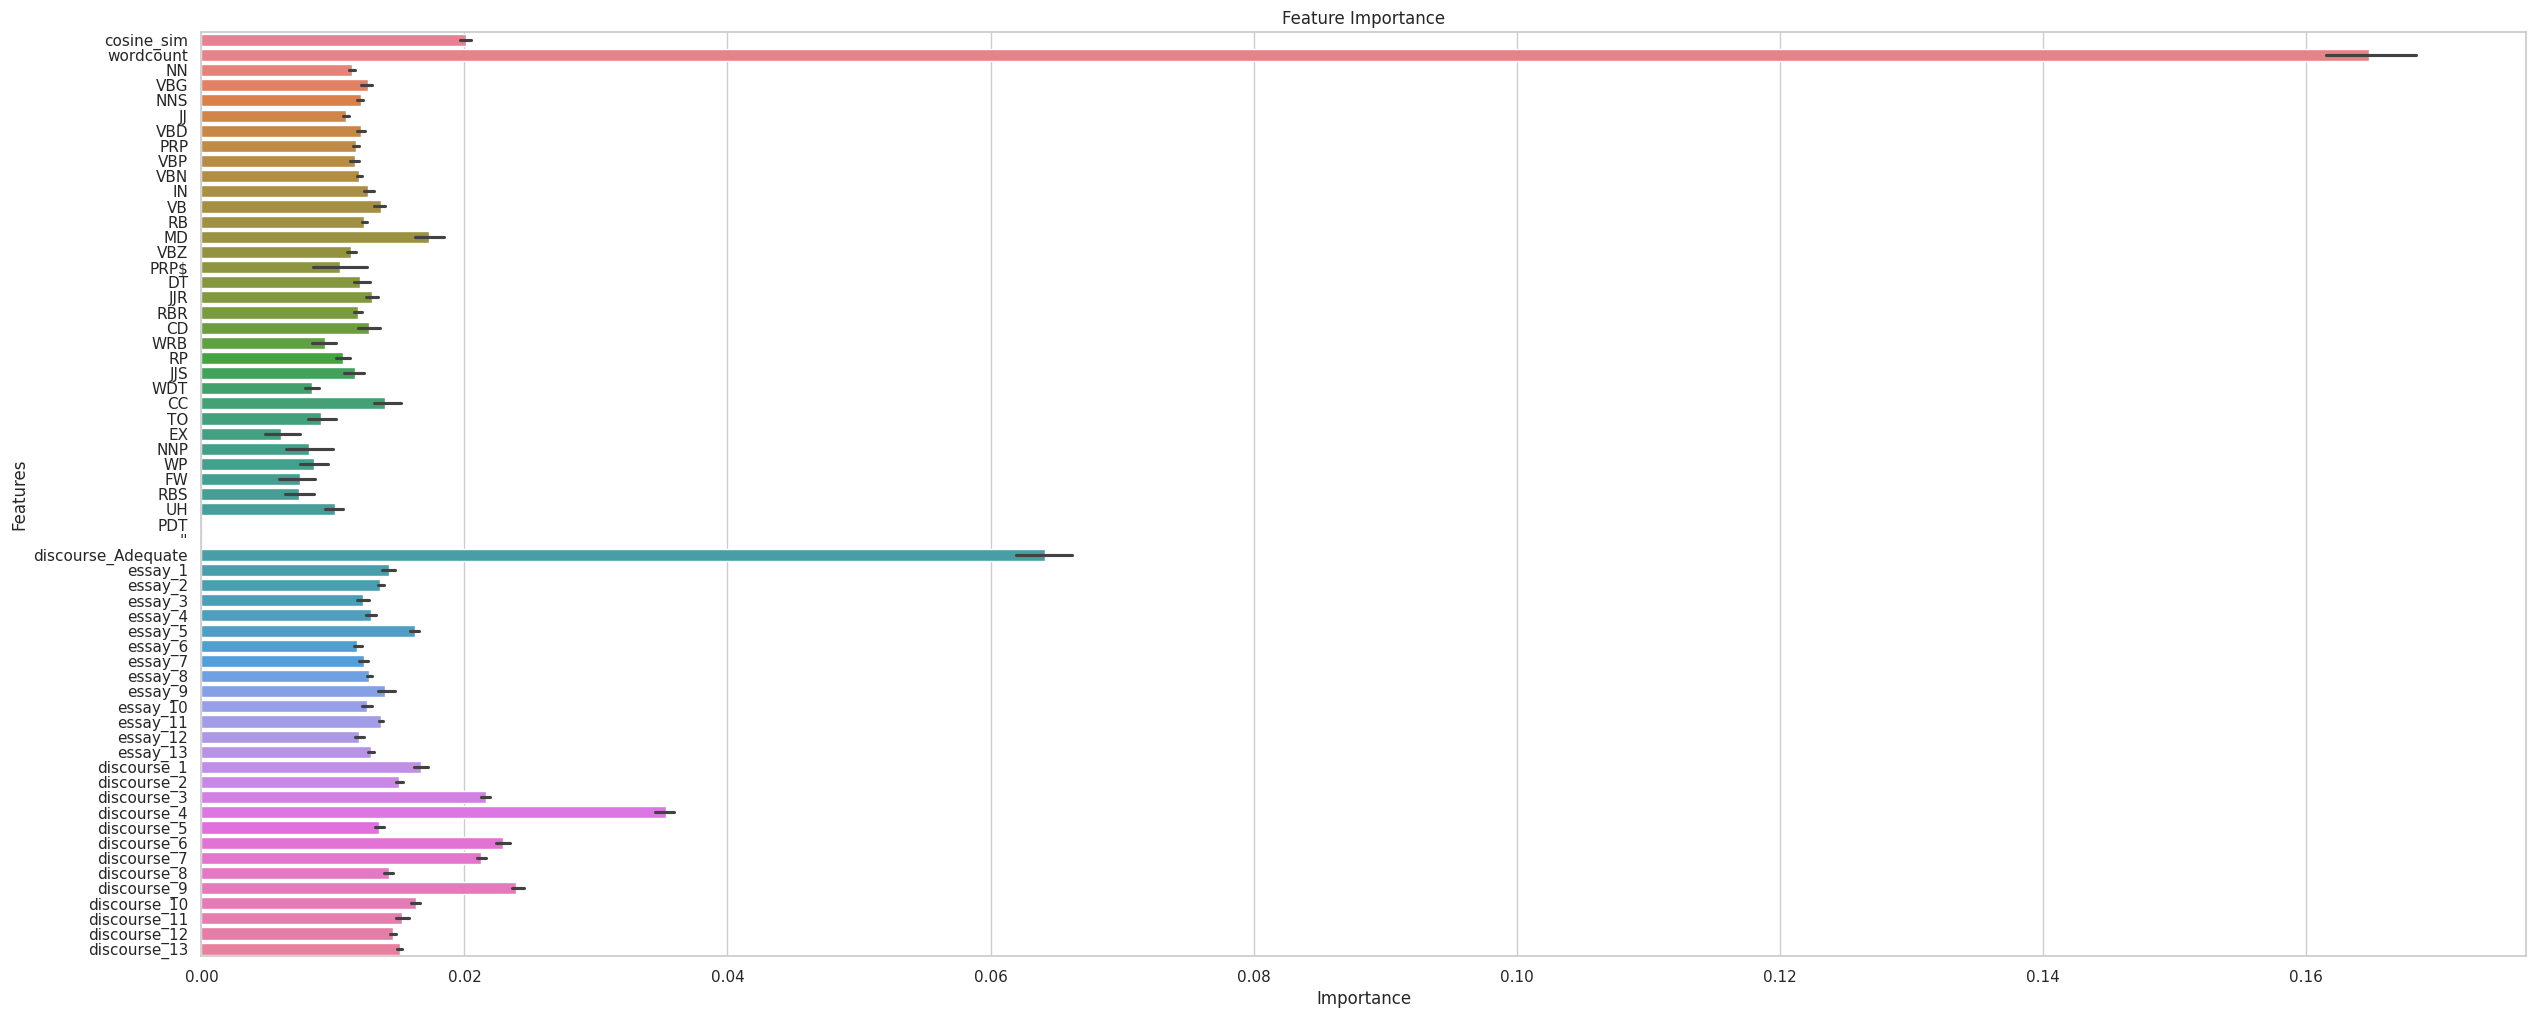

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 설정
plt.figure(figsize=(30, 12))
sns.set(style="whitegrid")

# 막대 그래프 생성
sns.barplot(data=result_df, orient='h')

# 그래프 제목과 라벨 설정
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# 그래프 표시

In [ ]:
results

In [ ]:
plt.figure(figsize=(10, int(len(feature_importances)/3.4)))
sns.barplot(x='Avg_Importance', y=feature_importances.index, data=feature_importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)
plt.title('XGBoost Classifier Average Feature Importances', size=15)
plt.show()